# Multiple Linear Regression
# Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]



In [141]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [144]:
Data=pd.read_csv("ToyotaCorolla.csv")
Data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [145]:
Data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [153]:
Data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [146]:
Data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [147]:
Data.shape

(1436, 38)

In [148]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [158]:
len(Data)

1436

In [159]:
Data = Data.rename({'Age_08_04': 'Age', 'Quarterly_Tax': 'QT'}, axis= 1)
Data.head(2)

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [161]:
Data = Data.loc[:, (("Price","Age","KM","HP","cc","Doors","Gears","QT","Weight"))]
Data.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [162]:
Data.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


<AxesSubplot:>

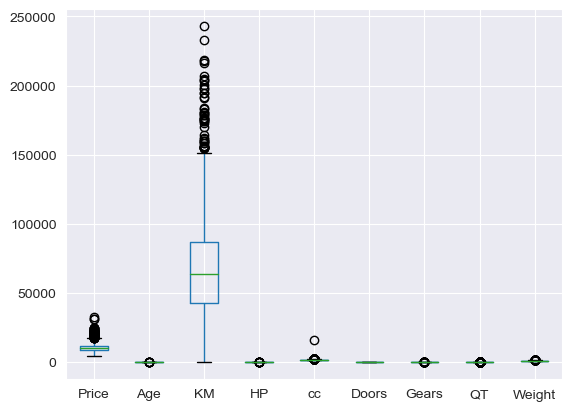

In [163]:
Data.boxplot()

# Correlation Matrix

In [164]:
Data.corr()


,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatterplot between variables along with histograms

In [214]:
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['figure.dpi'] = 100

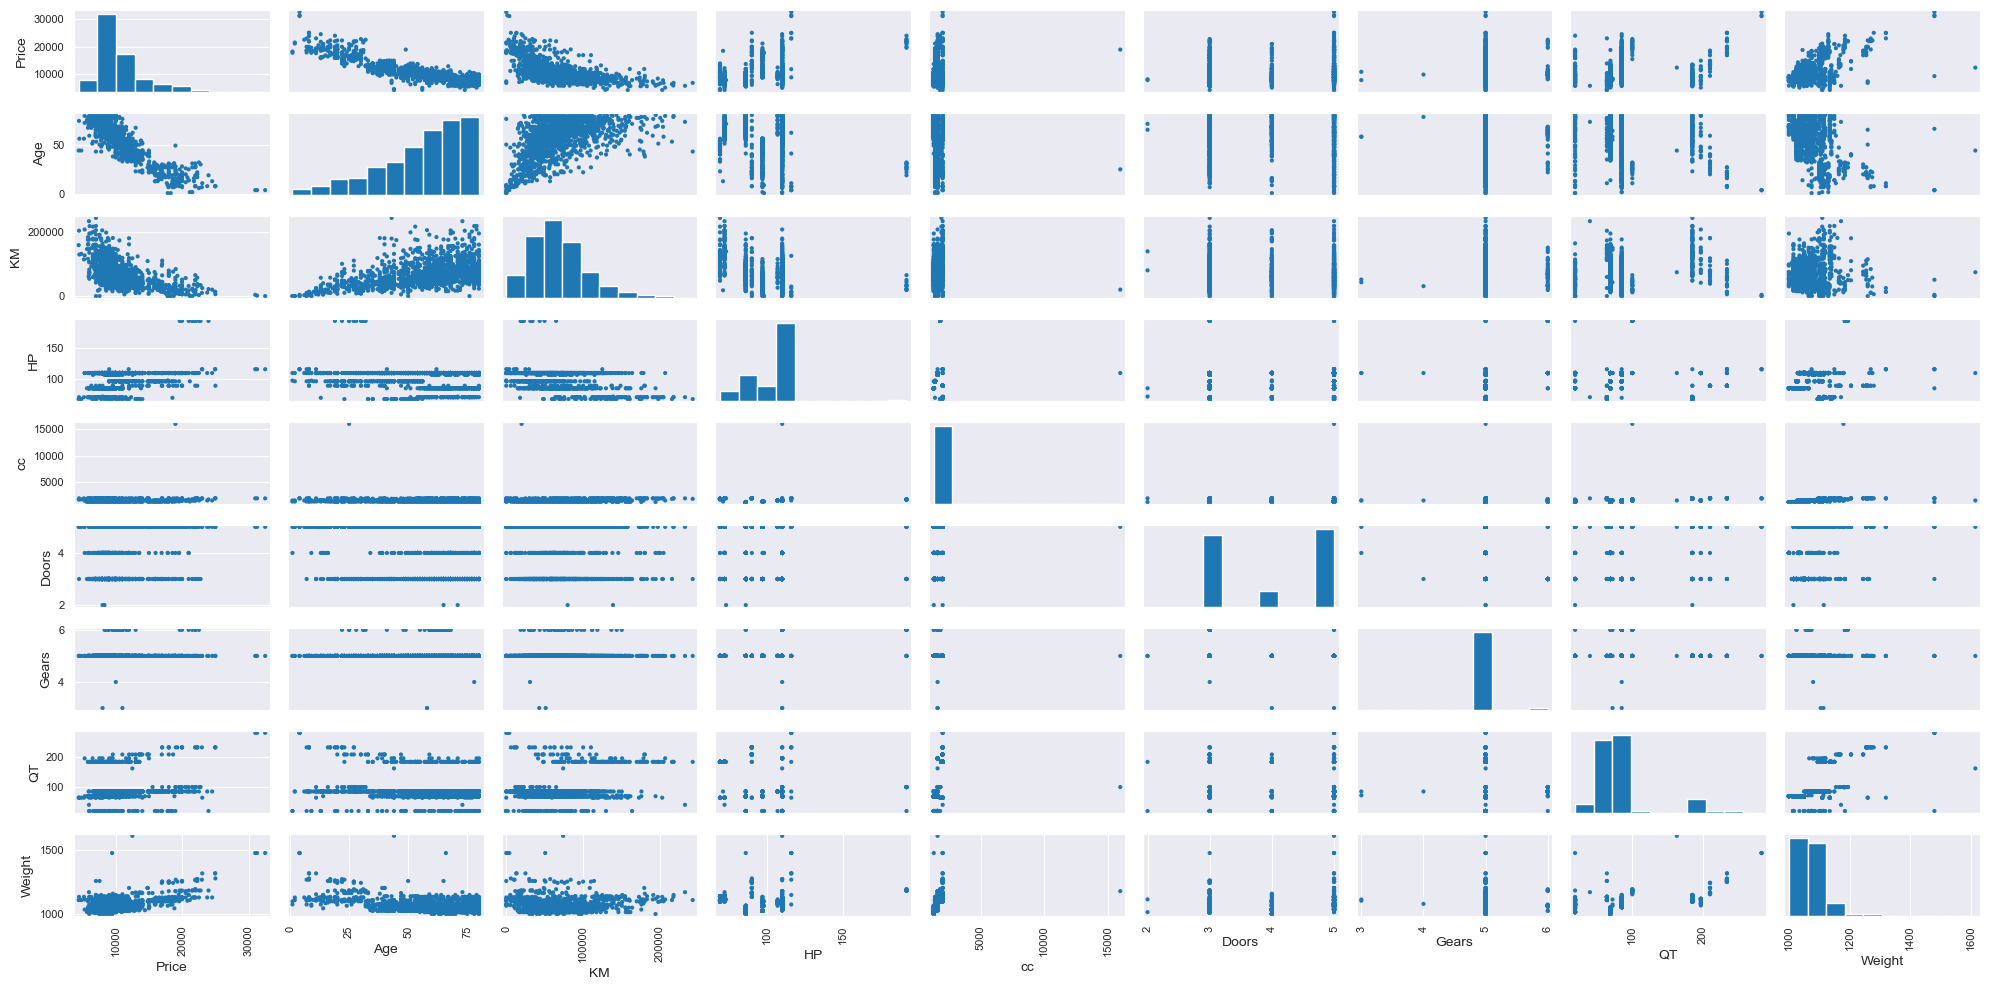

In [215]:
pd.plotting.scatter_matrix(Data, alpha=1)
plt.tight_layout()

# Preparing a model

In [171]:
#Build model
import statsmodels.formula.api as smf 
model_ols = smf.ols('Price~ Age+ KM+ HP+ cc+ Doors+ Gears+ QT+ Weight',data=Data).fit()

In [172]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:09:49   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [173]:
#Coefficients
model_ols.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [174]:
#t and p-Values
print(model_ols.tvalues, '\n', model_ols.pvalues)

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
QT            3.014535
Weight       15.879803
dtype: float64 
 Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
QT            2.619148e-03
Weight        2.048576e-52
dtype: float64


In [175]:
#R squared values
(model_ols.rsquared,model_ols.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

# Simple Linear Regression Models

In [177]:
model1=smf.ols('Price~cc',data = Data).fit()  
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues) 

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [179]:
model2=smf.ols('Price~Doors',data = Data).fit()  
#t and p-Values
print(model2.tvalues, '\n', model2.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [180]:
model3=smf.ols('Price~cc+ Doors',data = Data).fit()  
#t and p-Values
print(model3.tvalues, '\n', model3.pvalues)

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


# Calculating VIF

In [183]:
rsq_Age = smf.ols('Age~ KM+ HP+ cc+ Doors+ Gears+ QT+ Weight',data=Data).fit().rsquared  
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~ Age+ HP+ cc+ Doors+ Gears+ QT+ Weight',data=Data).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~ Age+ KM+ cc+ Doors+ Gears+ QT+ Weight',data=Data).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~ Age+ KM+ HP+ Doors+ Gears+ QT+ Weight',data=Data).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~ Age+ KM+ cc+ HP+ Gears+ QT+ Weight',data=Data).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~ Age+ KM+ cc+ Doors+ HP+ QT+ Weight',data=Data).fit().rsquared
vif_Gears= 1/(1-rsq_Gears)

rsq_QT = smf.ols('QT~ Age+ KM+ cc+ Doors+ Gears+ HP+ Weight',data=Data).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_Weight = smf.ols('Weight~ Age+ KM+ cc+ Doors+ Gears+ QT+ HP',data=Data).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)
     


In [184]:
# Storing vif values in a data frame
VIF = pd.DataFrame({
    "Feature":['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight'],
    'VIF': [vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_Weight]
})
VIF

,Feature,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

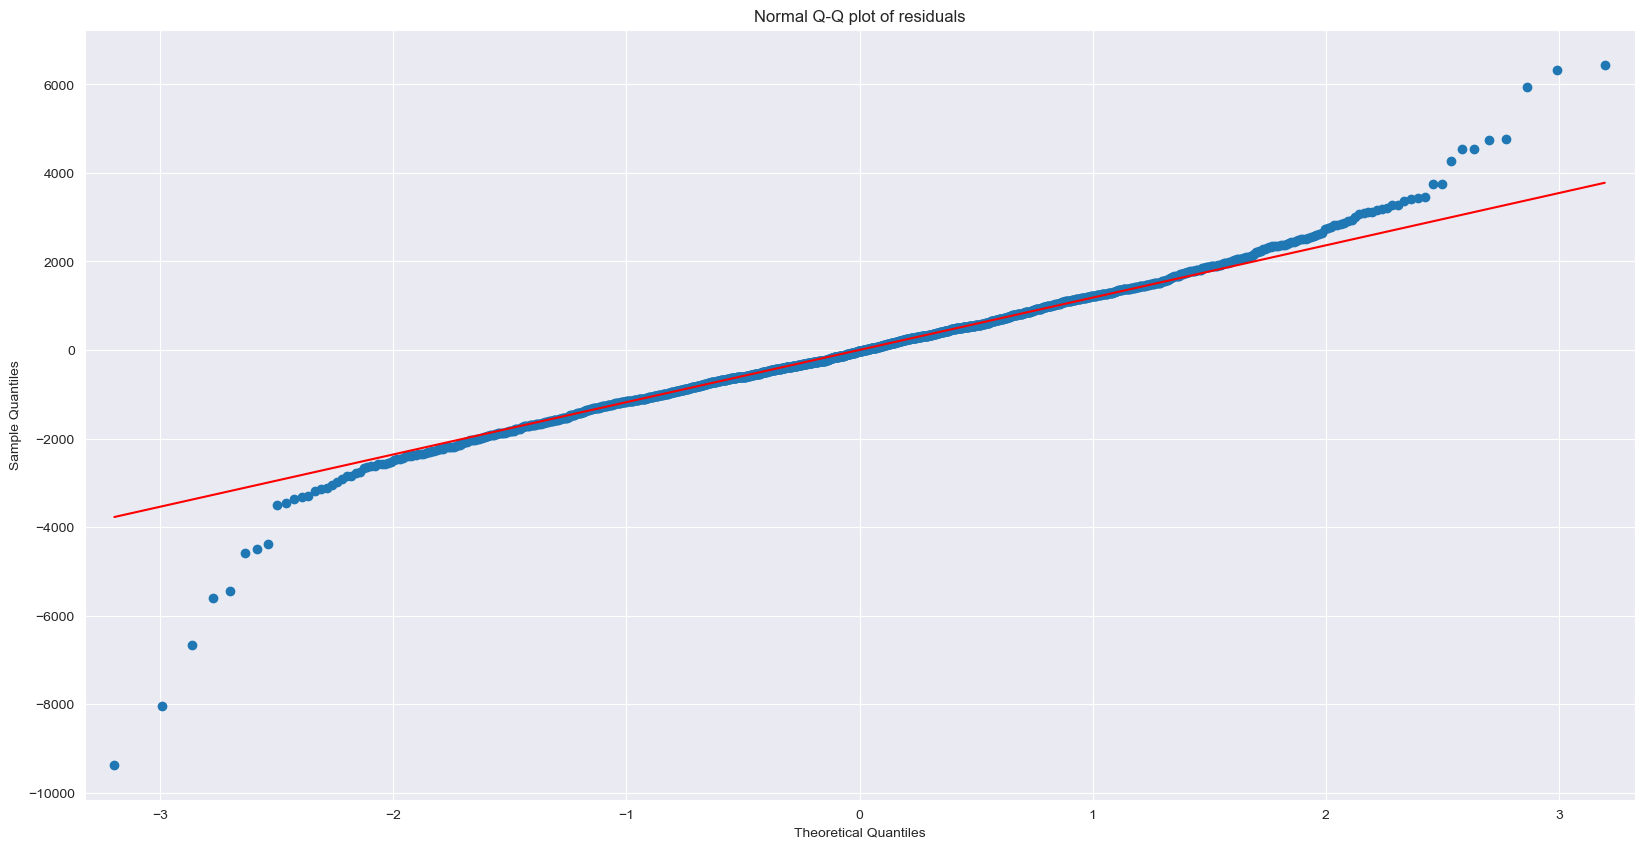

In [185]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_ols.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [186]:
list(np.where(model_ols.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

# Residual Plot for Homoscedasticity

In [187]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

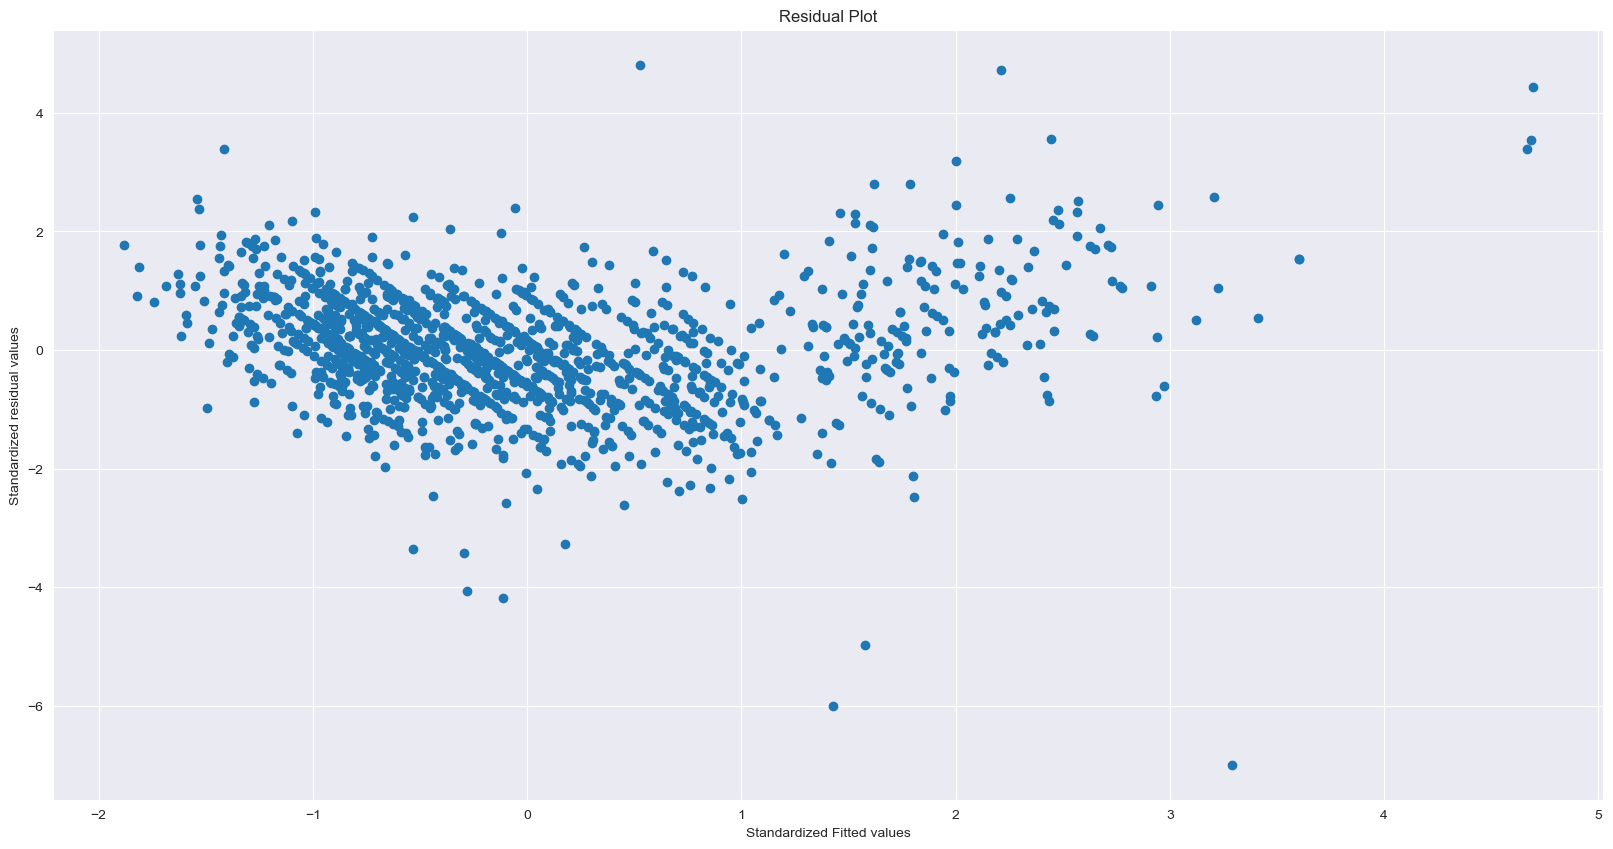

In [188]:
plt.scatter(get_standardized_values(model_ols.fittedvalues),
            get_standardized_values(model_ols.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


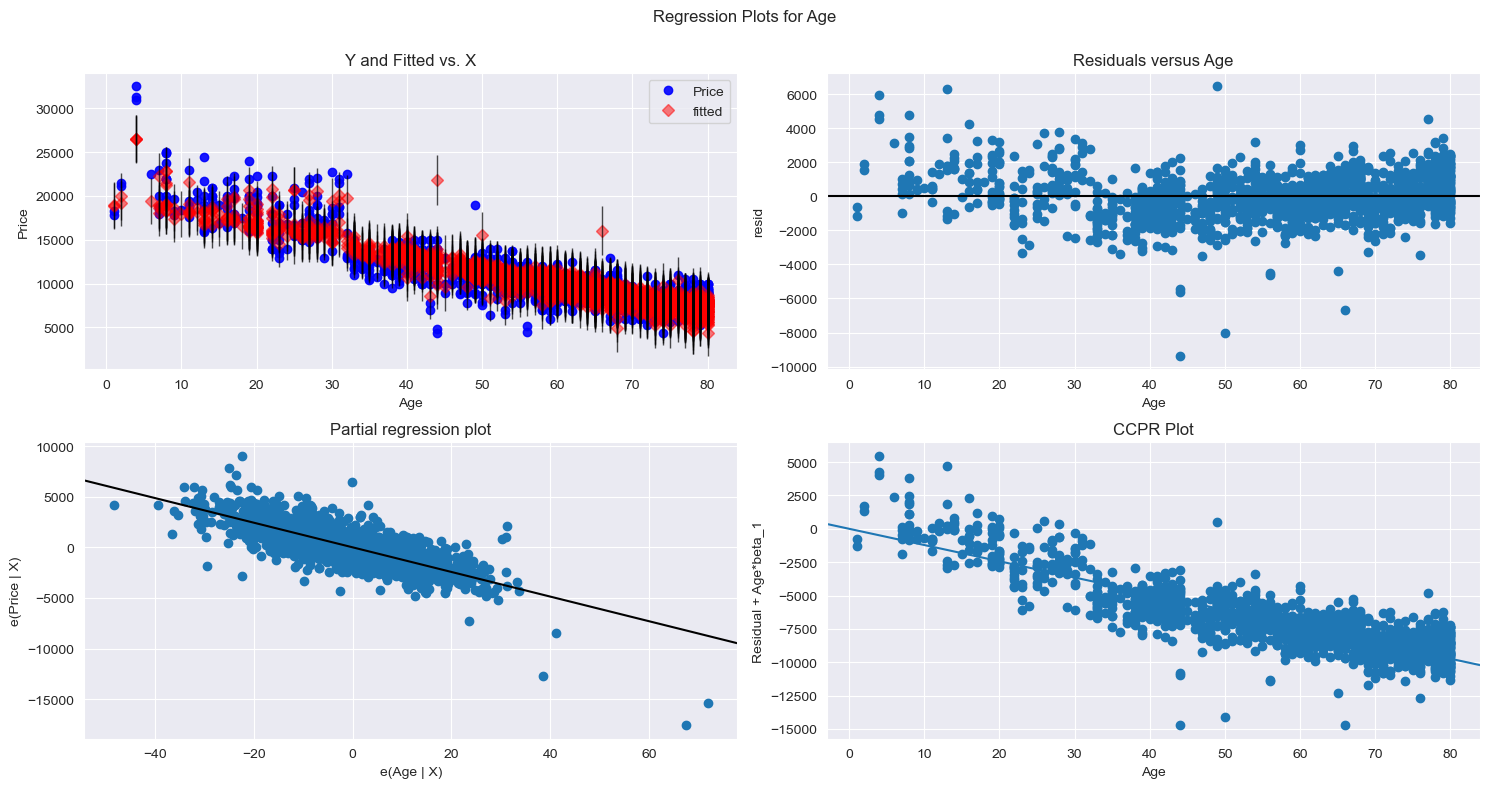

In [190]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_ols, "Age", fig=fig)
plt.show()

eval_env: 1


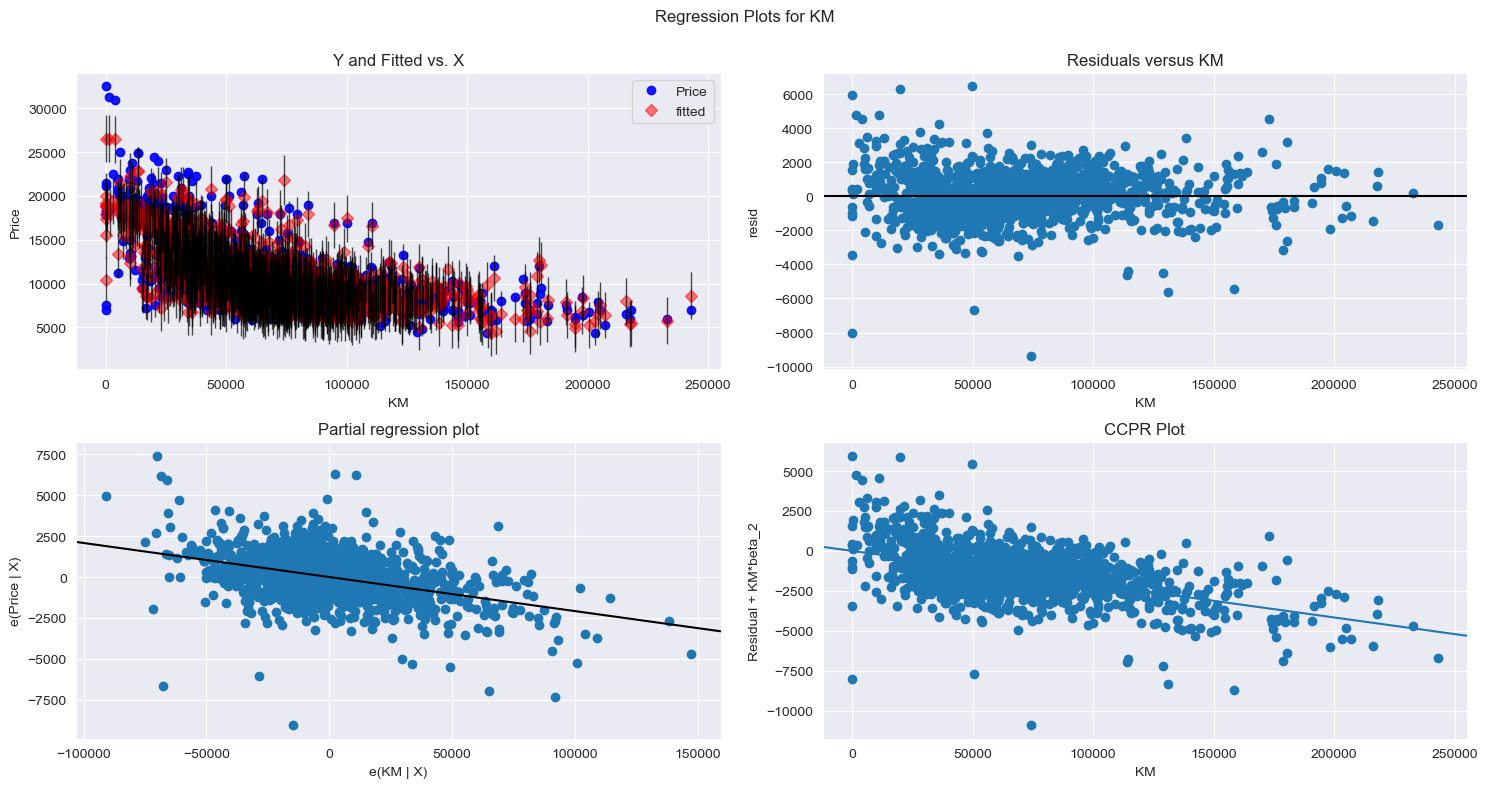

In [191]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_ols, "KM", fig=fig)
plt.show()

eval_env: 1


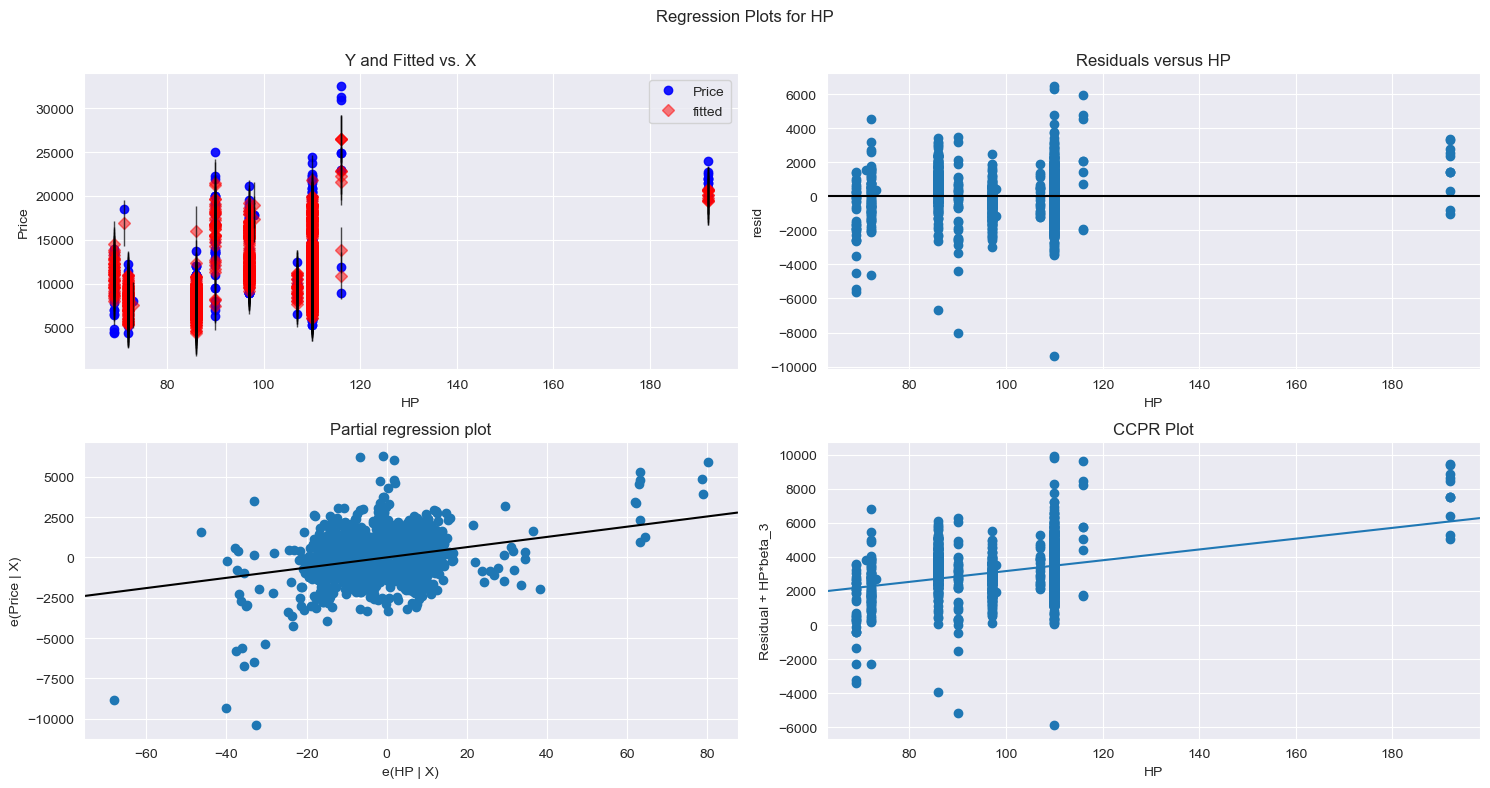

In [193]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_ols, "HP", fig=fig)
plt.show()

eval_env: 1


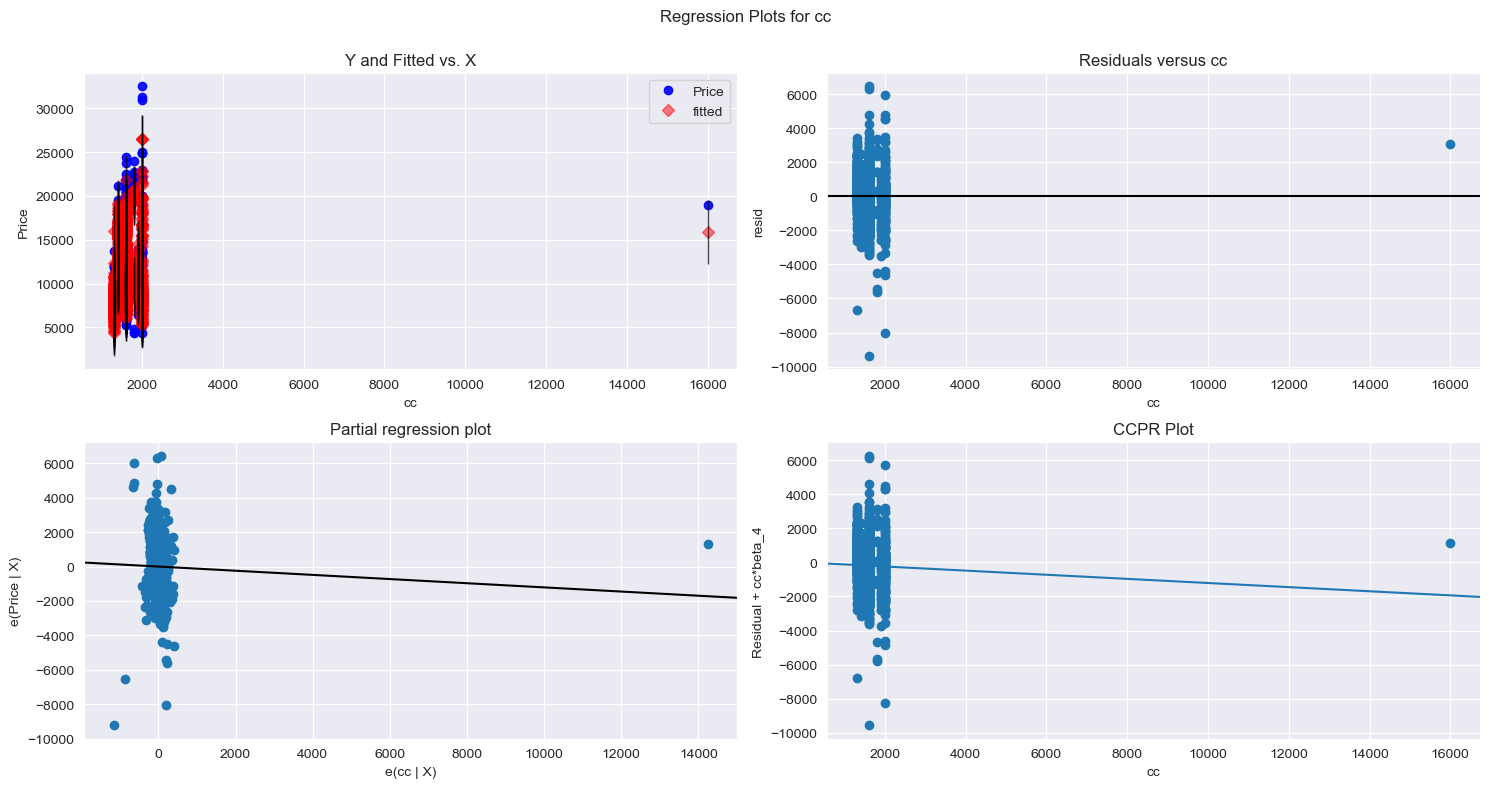

In [194]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_ols, "cc", fig=fig)
plt.show()

eval_env: 1


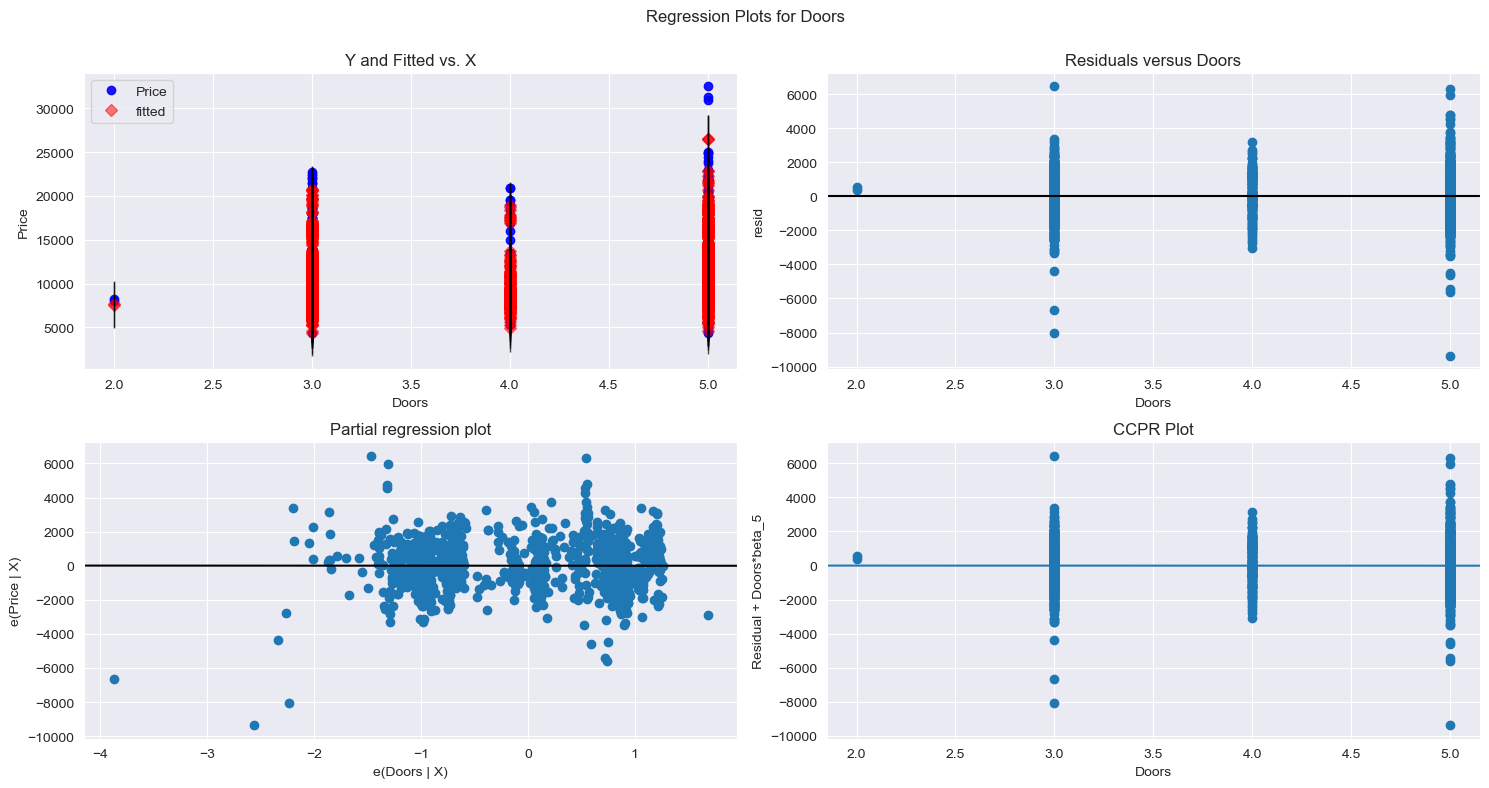

In [195]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_ols, "Doors", fig=fig)
plt.show()

eval_env: 1


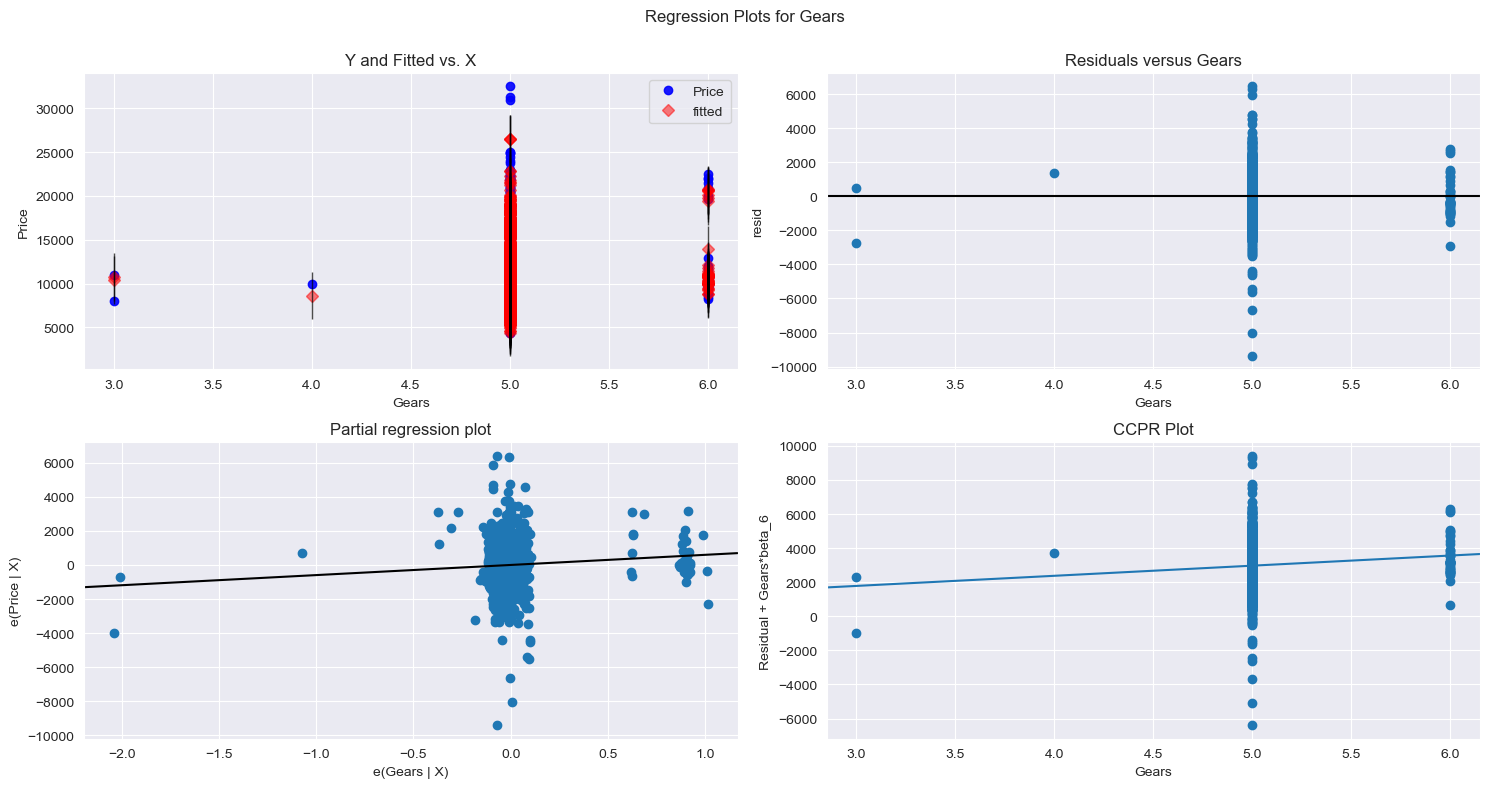

In [196]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_ols, "Gears", fig=fig)
plt.show()

eval_env: 1


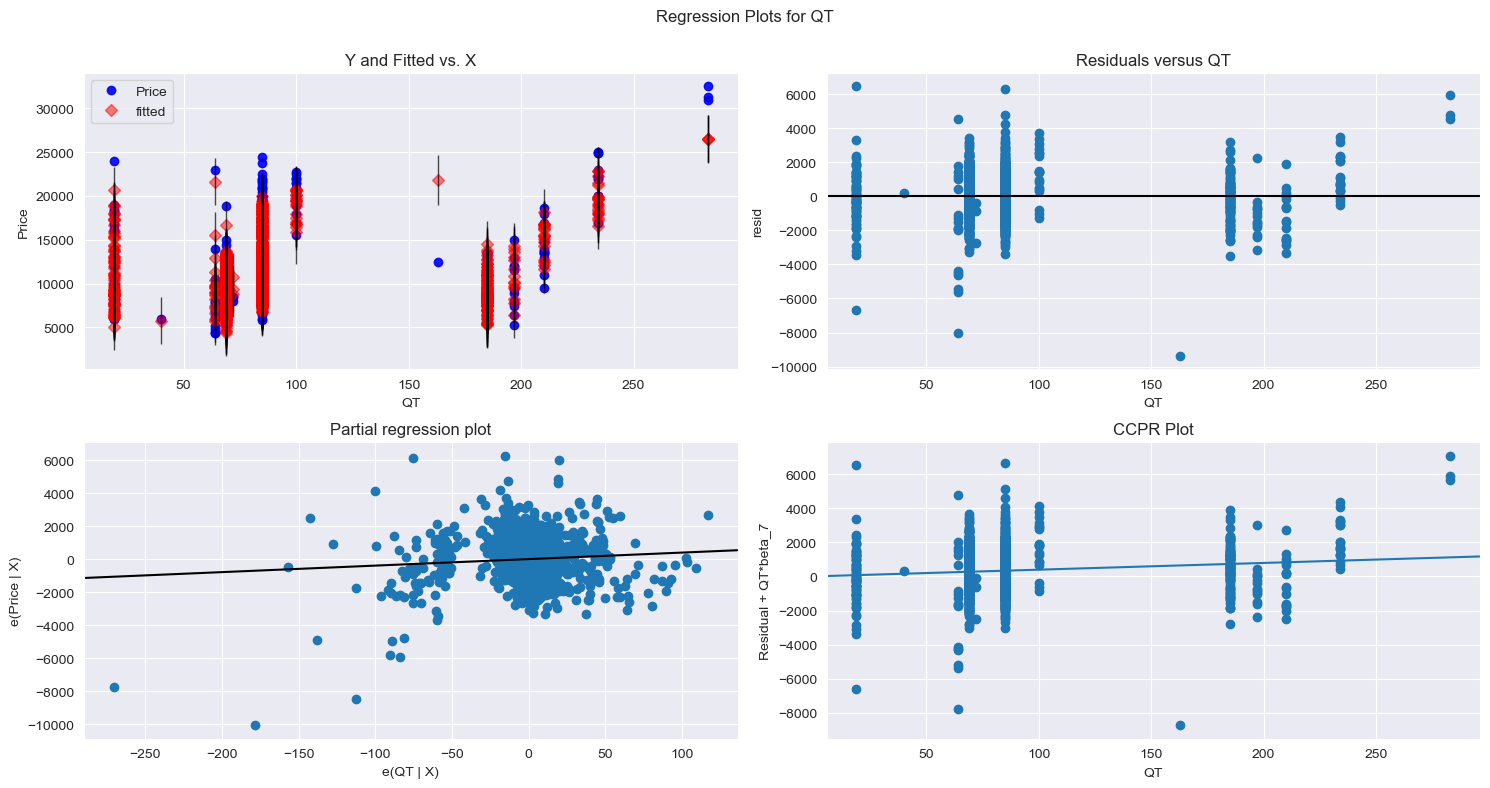

In [197]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_ols, "QT", fig=fig)
plt.show()

eval_env: 1


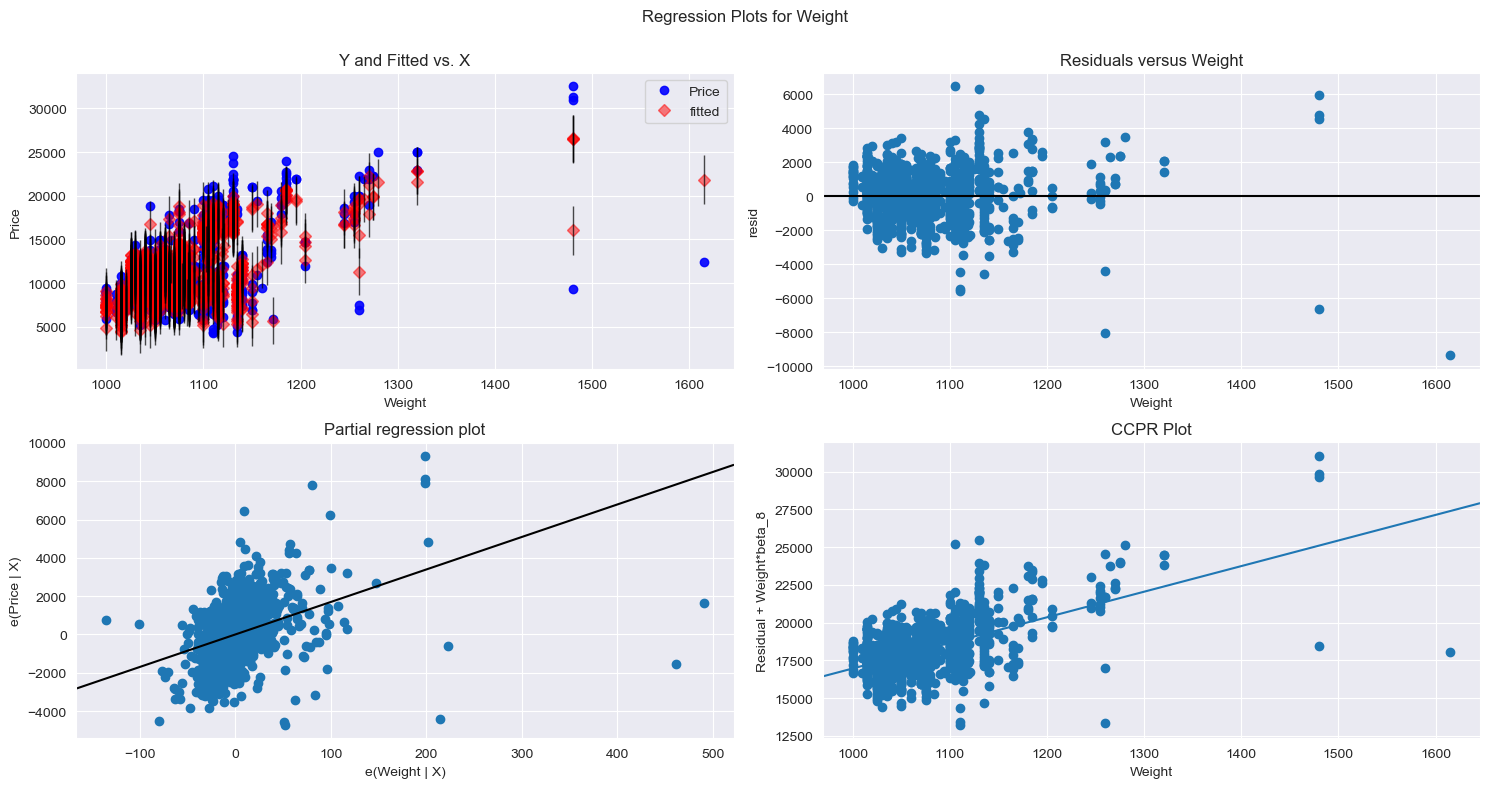

In [198]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_ols, "Weight", fig=fig)
plt.show()

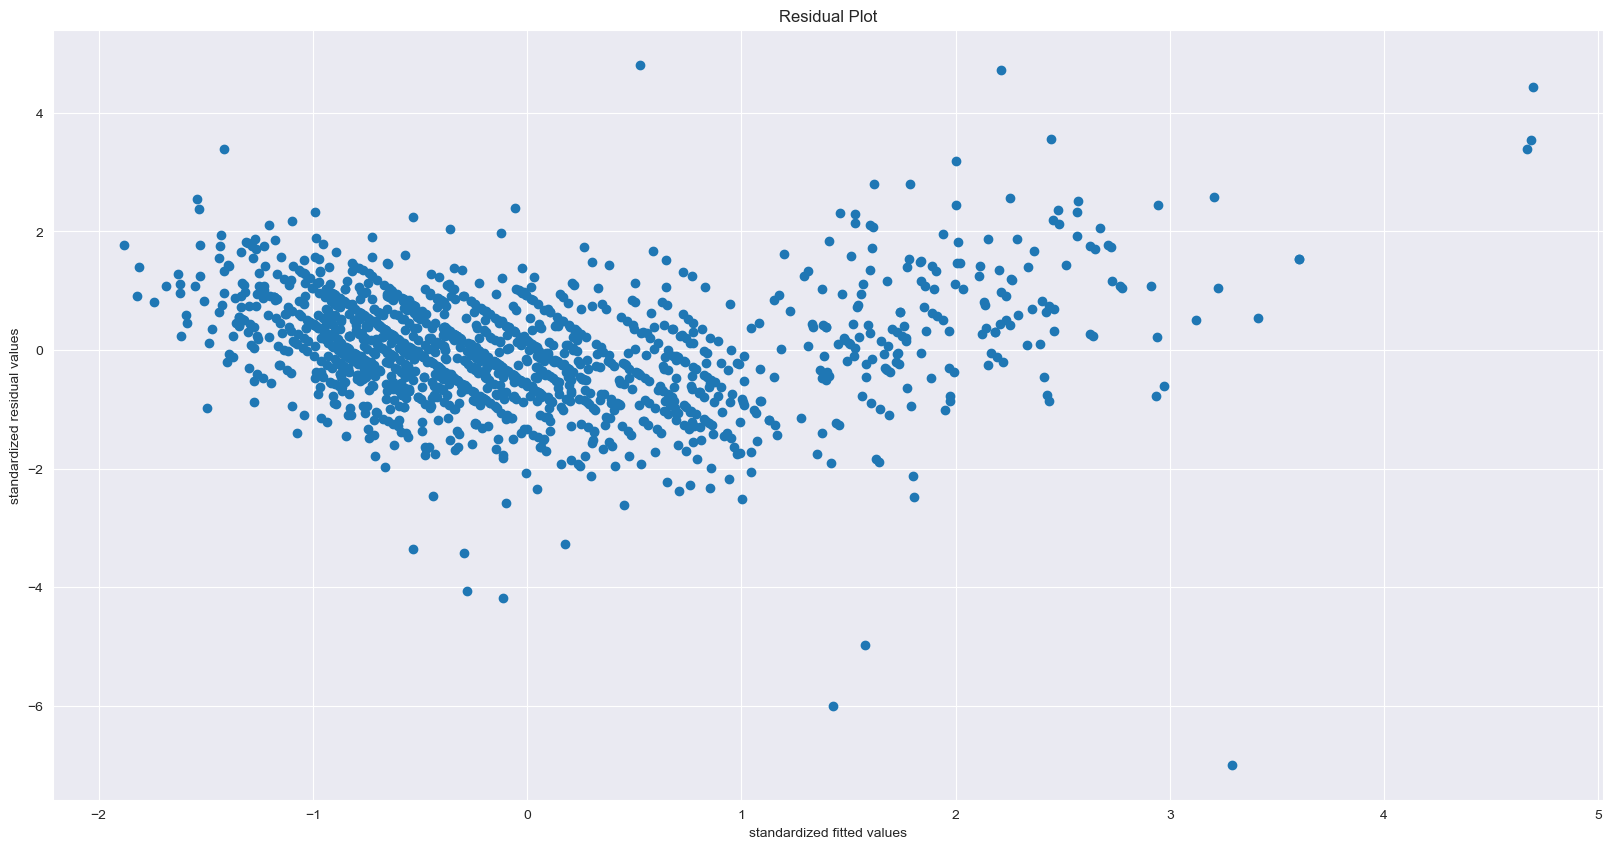

In [201]:

# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(values) : return (values-values.mean())/values.std()  # User defined z = (x - mu)/sigma
plt.scatter(standard_values(model_ols.fittedvalues),standard_values(model_ols.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 
     

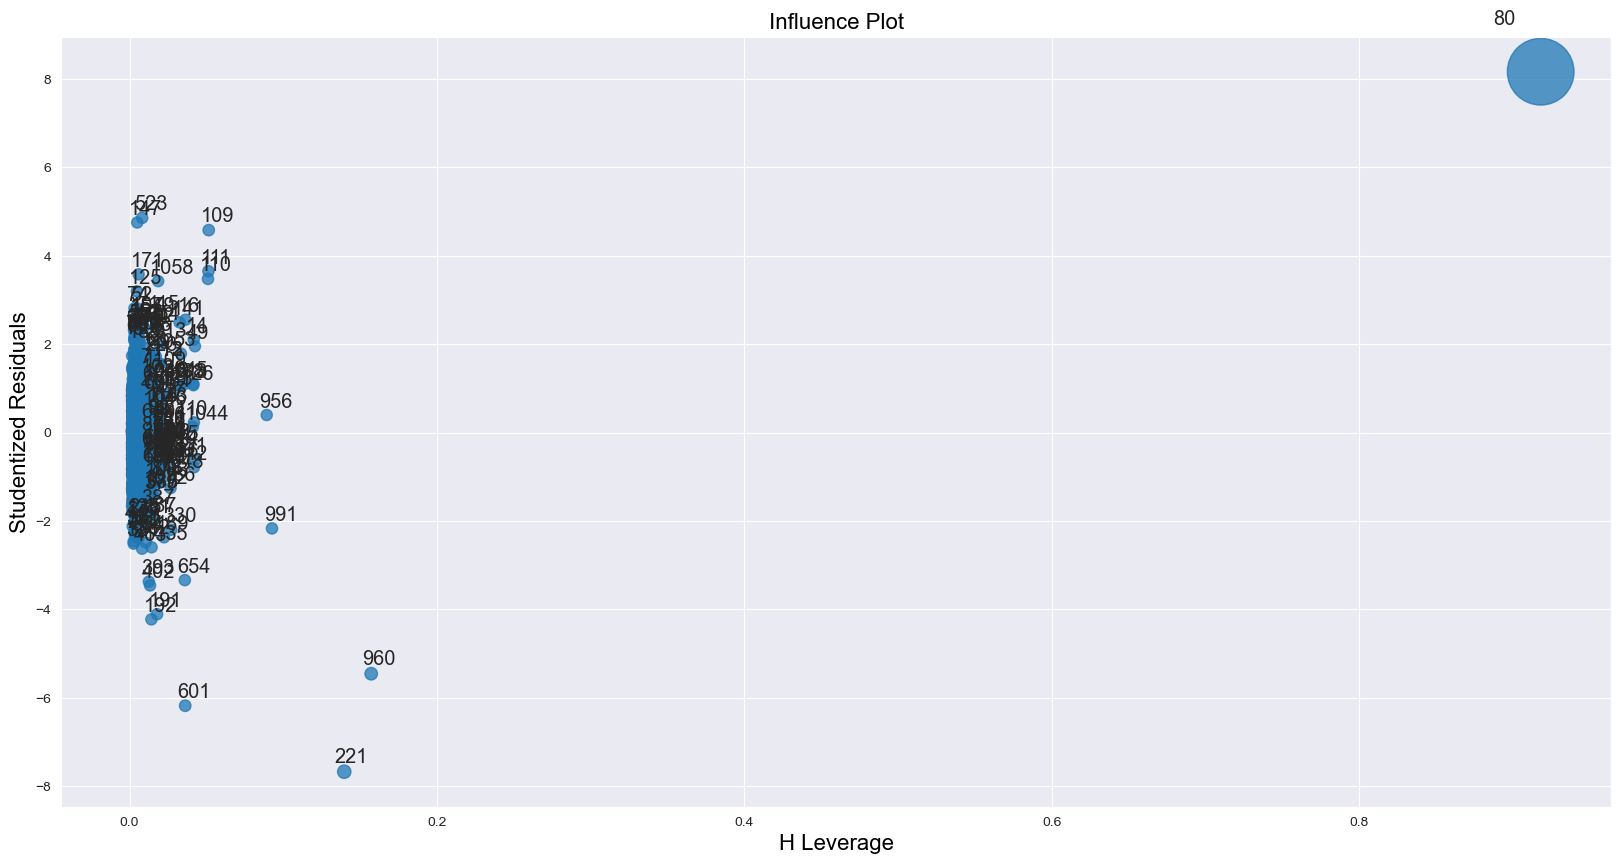

In [202]:
sm.graphics.influence_plot(model_ols)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [206]:
model_influence = model_ols.get_influence()
(c,_) = model_influence.cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

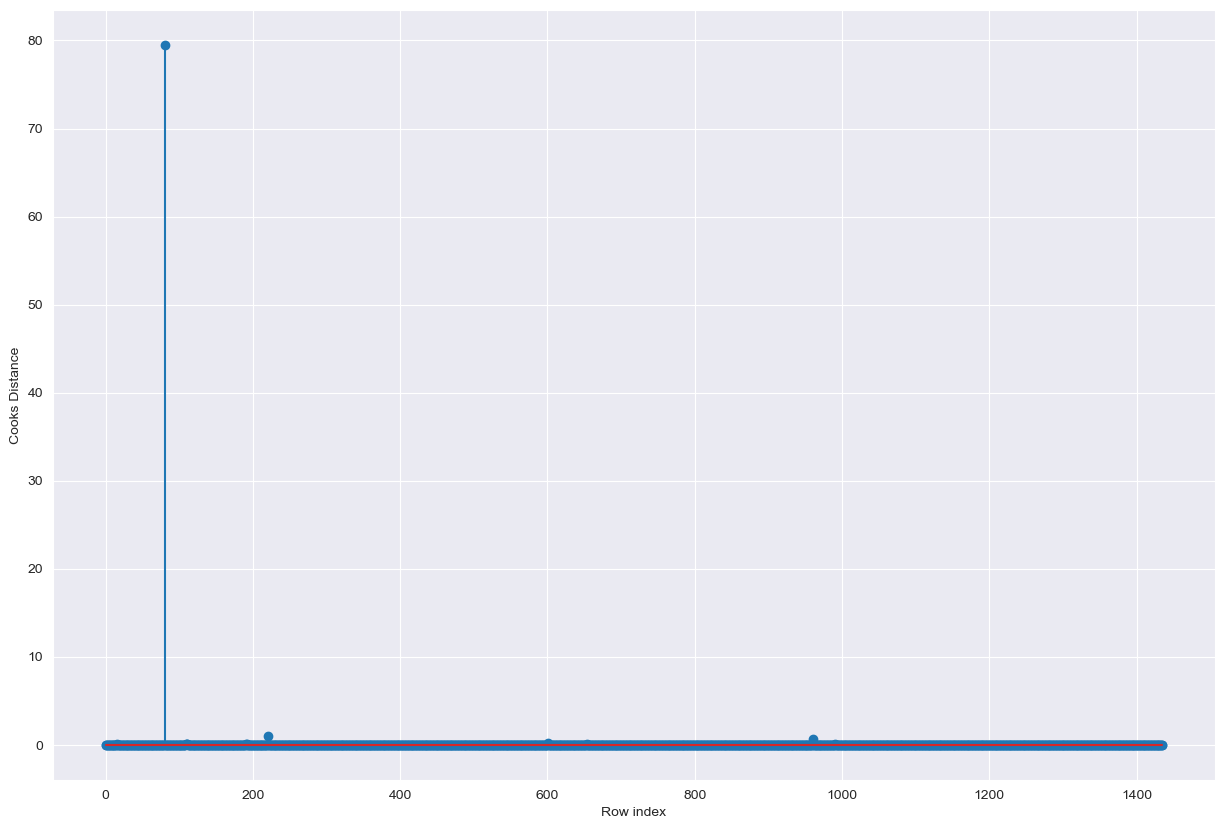

In [208]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(15, 10))
plt.stem(np.arange(len(Data1)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [209]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624143949)

# Leverage Cuttoff Value = 3*(k+1)/n 
# k = no.of features/columns & n = no. of datapoints

In [216]:
k=Data.shape[1]
n=Data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('leverage_cutoff::',leverage_cutoff)

leverage_cutoff:: 0.020891364902506964


In [217]:
Data[Data.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving model

In [219]:
model_final = smf.ols('Price~ Age+ KM+ HP+ cc+ Doors+ Gears+ QT+ Weight',data=Data).fit() 
model_final.tvalues, model_final.pvalues


(Intercept    -3.948666
 Age         -46.511852
 KM          -16.621622
 HP           11.241018
 cc           -1.344222
 Doors        -0.040410
 Gears         3.016007
 QT            3.014535
 Weight       15.879803
 dtype: float64,
 Intercept     8.241949e-05
 Age          3.354724e-288
 KM            7.538439e-57
 HP            3.757218e-28
 cc            1.790902e-01
 Doors         9.677716e-01
 Gears         2.606549e-03
 QT            2.619148e-03
 Weight        2.048576e-52
 dtype: float64)

In [220]:
model_final.rsquared, model_final.rsquared_adj

(0.8637627463428191, 0.8629989775766962)

# Predicting New Data Points

In [222]:
new_data = pd.DataFrame({
    "Age":[25,26,27,28],
    'KM':[84425,54673,94867,47436],
    'HP':[80,96,110,90],
    'cc':[2010,1955,1962,2234],
    'Doors':[2,3,3,2],
    'Gears':[5,6,6,9],
    'QT':[234,214,197,220],
    'Weight':[1156,1132,1554,1223]
})
new_data
     

,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,25,84425,80,2010,2,5,234,1156
1,26,54673,96,1955,3,6,214,1132
2,27,94867,110,1962,3,6,197,1554
3,28,47436,90,2234,2,9,220,1223


In [223]:
model_final.predict(new_data)

0    15415.638034
1    16533.600385
2    23107.311536
3    19568.571159
dtype: float64